# Classification

## - Decision Tree

In [85]:
#Decision Tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.metrics import f1_score,roc_auc_score,precision_recall_curve,roc_curve

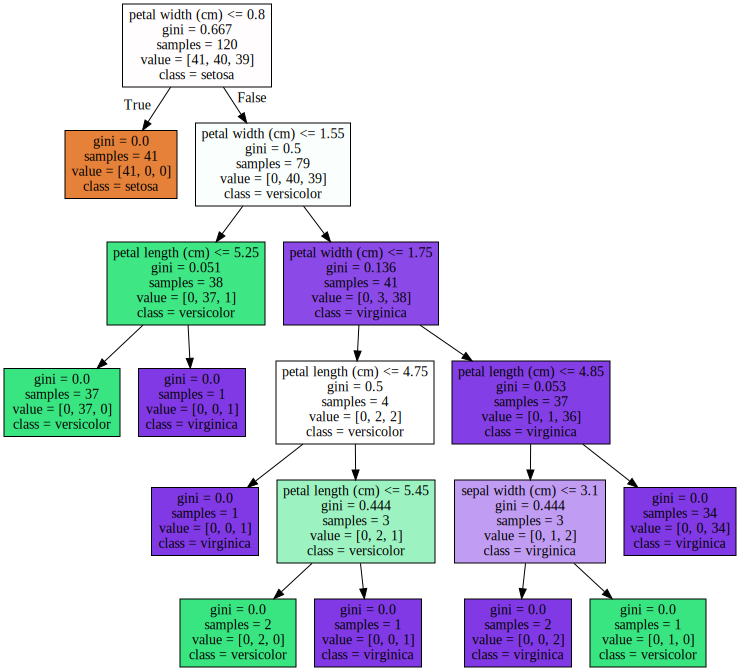

In [2]:
#%%
iris = load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=11)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

# %%
#export_graphviz(dt_clf,out_file='tree.dot',class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)

with open(r'C:\Users\uos\Desktop\mc\파이썬 머신러닝 완벽 가이드\tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

DecisionTreeClassifier model 생성 시 parameter : min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes

<overfitting 대비 parameter tuning>
1. min_samples_split 를 높여서 데이터가 분할하는데 필요한 샘플 데이터 수를 높인다.
2. min_samples_leaf 를 높여서 말단 노드의 샘플 데이터의 수를 높인다
3. max_features 조절 : 'sqrt', 'auto', 'log', 'None'
4. max_depth 조절
5. max_leaf_nodes : 말단 노드의 최대 개수

In [21]:
#%% feature importance
print('Feature importance:',dt_clf.feature_importances_)

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.4f}'.format(name,value))

Feature importance: [0.         0.01667014 0.56323788 0.42009198]
sepal length (cm):0.0000
sepal width (cm):0.0167
petal length (cm):0.5632
petal width (cm):0.4201


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\uos\miniconda3\envs\deep\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


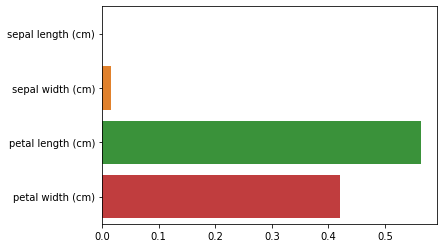

In [20]:
# Visualization
sns.barplot(dt_clf.feature_importances_,y=iris.feature_names)

- Petal length가 가장 중요한 변수

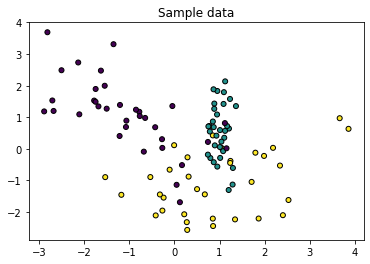

In [34]:
# Decision Tree overfitting

#randomsample 생성
x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#plt.title("Sample data")
plt.scatter(x_features[:,0], x_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [37]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\uos\miniconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


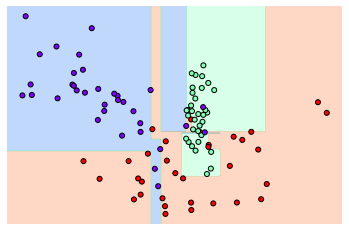

In [39]:
dt_clf = DecisionTreeClassifier().fit(x_features,y_labels)
visualize_boundary(dt_clf,x_features,y_labels)

C:\Users\uos\miniconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


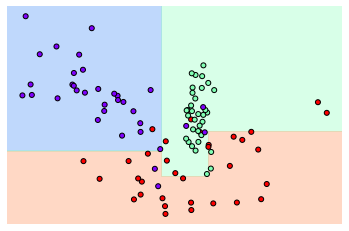

In [40]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features,y_labels)
visualize_boundary(dt_clf,x_features,y_labels)

- 시각화 한 것을 봤을 때 min_samples_leaf를 높여준 것이 이상치에 덜 반응하는 것으로 보아 좀 더 일반적인 분류 규칙에 따라 분류되었음을 알 수 있다. 따라서, Overfitting을 줄여주는 효과 가진다고 볼 수 있다.

## - 실습: 사용자 행동인식 데이터 세트

In [13]:
#feature 불러오기
feature_name_df = pd.read_csv(r'C:\Users\uos\Desktop\mc\data\UCI HAR Dataset\UCI HAR Dataset\features.txt',sep='\s+',header=None,names=['column_index','column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [21]:
# 중복 정도 확인
dup = feature_name_df.groupby('column_name').count()
print(dup[dup['column_index']>1].count())
print(dup[dup['column_index']>1].head())

column_index    42
dtype: int64
                              column_index
column_name                               
fBodyAcc-bandsEnergy()-1,16              3
fBodyAcc-bandsEnergy()-1,24              3
fBodyAcc-bandsEnergy()-1,8               3
fBodyAcc-bandsEnergy()-17,24             3
fBodyAcc-bandsEnergy()-17,32             3


In [46]:
### features.txt 파일에 있는 컬럼명을 입력 받아서 중복된 컬럼명은 
##  원본 컬럼명 _1, _2와 같이 중복된 차수를 원본 컬럼명에 더해서 컬럼명을 update 해주는 함수

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                               if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [49]:
def get_human_dataset( ):
    feature_name_df = pd.read_csv(r'C:\Users\uos\Desktop\mc\data\UCI HAR Dataset\UCI HAR Dataset\features.txt',sep='\s+',header=None,names=['column_index','column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    x_train = pd.read_csv(r'C:\Users\uos\Desktop\mc\data\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt',sep='\s+', names=feature_name )
    x_test = pd.read_csv(r'C:\Users\uos\Desktop\mc\data\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt',sep='\s+', names=feature_name)
    
    y_train = pd.read_csv(r'C:\Users\uos\Desktop\mc\data\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv(r'C:\Users\uos\Desktop\mc\data\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = get_human_dataset()

In [53]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [55]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [68]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
pred = dt_clf.predict(x_test)

In [83]:
def clf_evaluation(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    print('ConfusionMatrix:')
    print(confusion)
    print('\nAccuracy: {0:.4f}'.format(accuracy))

In [84]:
clf_evaluation(y_test,pred)

ConfusionMatrix:
[[444  34  18   0   0   0]
 [ 74 350  47   0   0   0]
 [ 21  46 353   0   0   0]
 [  0   0   0 360 131   0]
 [  0   0   0  76 456   0]
 [  0   0   0   0   0 537]]

Accuracy: 0.8483


In [87]:
print('Hyperparameter:',dt_clf.get_params())

Hyperparameter: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [95]:
# GridSearchCV

params = {'max_depth':[8,12,16,20],'min_samples_split':[16,24]}
grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

In [96]:
print('Best Accuracy:{0:.4f}'.format(grid_cv.best_score_))
print('Best Hyperparameter',grid_cv.best_params_)

Best Accuracy:0.8511
Best Hyperparameter {'max_depth': 8, 'min_samples_split': 16}


In [97]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(x_test)
accuracy = accuracy_score(y_test,pred1)
print('Best Accuracy:{0:.4f}'.format(grid_cv.best_score_))

Best Accuracy:0.8511


In [98]:
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
print(ftr_top20)

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,24    0.214038
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101548
fBodyGyro-maxInds-X                0.023971
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAcc-energy()-Y             0.016433
tGravityAccMag-arCoeff()1          0.012612
fBodyAcc-max()-Y                   0.008825
tBodyGyro-max()-X                  0.008550
tBodyAcc-correlation()-X,Y         0.006710
tGravityAcc-max()-Y                0.006290
tGravityAcc-min()-Y                0.006114
fBodyGyro-max()-X                  0.005247
tBodyGyro-min()-X                  0.004373
tBodyAccJerk-correlation()-X,Y     0.003967
tBodyGyroJerk-max()-X              0.003471
tBodyAccMag-arCoeff()1             0.003129
tGravityAcc-arCoeff()-Y,3          0.003025
dtype: float64


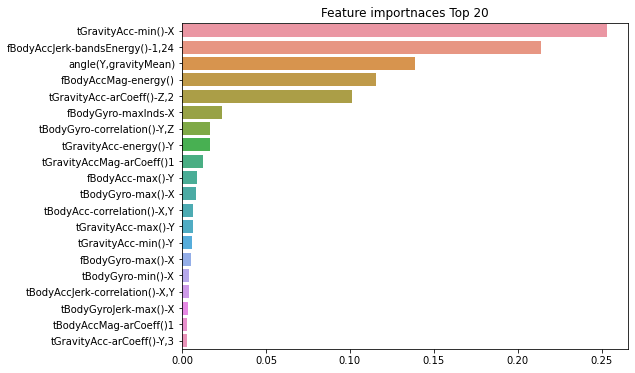

In [100]:
plt.figure(figsize=(8,6))
plt.title('Feature importnaces Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()